# <center> Stock price forecast - ARIMA

### What is a Stock price?
Companies that become public, which means those which the general puclic can invest onto, are divided in small fractions that are called shares. Those shares are available for purchase in the form of investment, and the price of each share varies depending on the revenue of said company, the amount of shares at the public disposal, the stability of the companie's finances, industry trends and so on... The more the shares are purchased the higher the price of each share becomes, following the the supply and demand logic. The opposite is also true. This could be affected though by poor management of the company, an economical recession, and a few other factors that are generally not the norm.
In other words, a Stock price is the value of the public sentiment towards publicly traded companies.

In this notebook we aim at analizing and forecasting the stock price of some of the most prominent companies in the Stock Market and some of the most known in the world. They are: Apple; Amazon; Google; Netflix; Nvidia and Tesla.

#### What is ARIMA?
Auto Regressive Integrated Moving Average (ARIMA) is a statistical methode used for time-series analysis and forecasting. It converts non-stationary data into stationary, and it's a very robust model that is used extensively in fields such as finance, economics, and for forecasting anything that happens thorughout a continuous period of time.

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install statsmodels

In [3]:
# import libraries
import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

In [4]:
# import the data 
aapl_df = pd.read_csv(r"C:\Users\vitor\Documents\Brainstation\Capstone\Data\AAPL.csv") # Apple
amzn_df = pd.read_csv(r"C:\Users\vitor\Documents\Brainstation\Capstone\Data\AMZN.csv") # Amazon
googl_df = pd.read_csv(r"C:\Users\vitor\Documents\Brainstation\Capstone\Data\GOOGL.csv") # Google
nflx_df = pd.read_csv(r"C:\Users\vitor\Documents\Brainstation\Capstone\Data\NFLX.csv") # Netflix
nvda_df = pd.read_csv(r"C:\Users\vitor\Documents\Brainstation\Capstone\Data\NVDA.csv") # Nvidia
tsla_df = pd.read_csv(r"C:\Users\vitor\Documents\Brainstation\Capstone\Data\TSLA.csv") # Tesla

In [5]:
# visualize the structure of the dataframe
tsla_df.head()

Date      Open      High       Low     Close  Adj Close     Volume
0  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
1  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
2  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
3  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500
4  2010-07-07  1.093333  1.108667  0.998667  1.053333   1.053333  103825500

This data goes from January 2009 until December of 2023 (The start date is the same for all dataframes but Tesla) with 7 features recorded in all of them:
- **Date** indicates the specific day when the stock was traded.
- **Open** means the price which the stock started being traded as the moment the trading day began.
- **High/Low** represents, respectively, the highest and lowest intra day price of the stock.
- **Close** indicates the price of the stock at the moment the trading day ended.
- **Adj Close** (Adjusted Close) reflects the actual price of the stock corporate actions, such as payment of dividends.
- **Volume** signifies the amount of trades that happened during the specified period (daily in this case).

In [6]:
# look at the shape of the data (rows and columns, respectively)
print(aapl_df.shape)
print(amzn_df.shape)
print(googl_df.shape)
print(nflx_df.shape)
print(nvda_df.shape)
print(tsla_df.shape)

(3762, 7)
(3762, 7)
(3762, 7)
(3762, 7)
(3762, 7)
(3388, 7)


In order to plot the data into charts I am going to index the dataframe based on their 'Date' column, using a function from pandas `to_datetime`

In [7]:
# changing the indexes of the dataframes using the pandas function 'to_datetime'
# Apple
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])
aapl_df = aapl_df.set_index('Date')
aapl_df.head()

Open      High       Low     Close  Adj Close      Volume
Date                                                                     
2009-01-05  3.327500  3.435000  3.311071  3.377857   2.863342  1181608400
2009-01-06  3.426786  3.470357  3.299643  3.322143   2.816114  1289310400
2009-01-07  3.278929  3.303571  3.223571  3.250357   2.755262   753048800
2009-01-08  3.229643  3.326786  3.215714  3.310714   2.806425   673500800
2009-01-09  3.328929  3.335000  3.219286  3.235000   2.742244   546845600

In [8]:
# Amazon
amzn_df['Date'] = pd.to_datetime(amzn_df['Date'])
amzn_df = amzn_df.set_index('Date')
# Google
googl_df['Date'] = pd.to_datetime(googl_df['Date'])
googl_df = googl_df.set_index('Date')
# Netflix
nflx_df['Date'] = pd.to_datetime(nflx_df['Date'])
nflx_df = nflx_df.set_index('Date')
# Nvidia
nvda_df['Date'] = pd.to_datetime(nvda_df['Date'])
nvda_df = nvda_df.set_index('Date')
# Tesla
tsla_df['Date'] = pd.to_datetime(tsla_df['Date'])
tsla_df = tsla_df.set_index('Date')

print(amzn_df.head(2))
print(googl_df.head(2))
print(nflx_df.head(2))
print(nvda_df.head(2))
print(tsla_df.head(2))

              Open   High     Low  Close  Adj Close     Volume
Date                                                          
2009-01-05  2.7865  2.787  2.6515  2.703      2.703  190196000
2009-01-06  2.7275  2.911  2.6875  2.868      2.868  221602000
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2009-01-05  8.033033  8.289289  7.882883  8.209459   8.209459  195364440
2009-01-06  8.332833  8.528529  8.167918  8.359860   8.359860  256750992
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2009-01-05  4.327143  4.562857  4.302857  4.562857   4.562857  13044500
2009-01-06  4.591429  4.750000  4.590000  4.705714   4.705714  12065900
              Open    High     Low   Close  Adj Close    Volume
Date                                                           
2009-01-05  2.1525  2.2675  2.1375  2.21

We are ready to take a first look into our charts using `matplotlib`

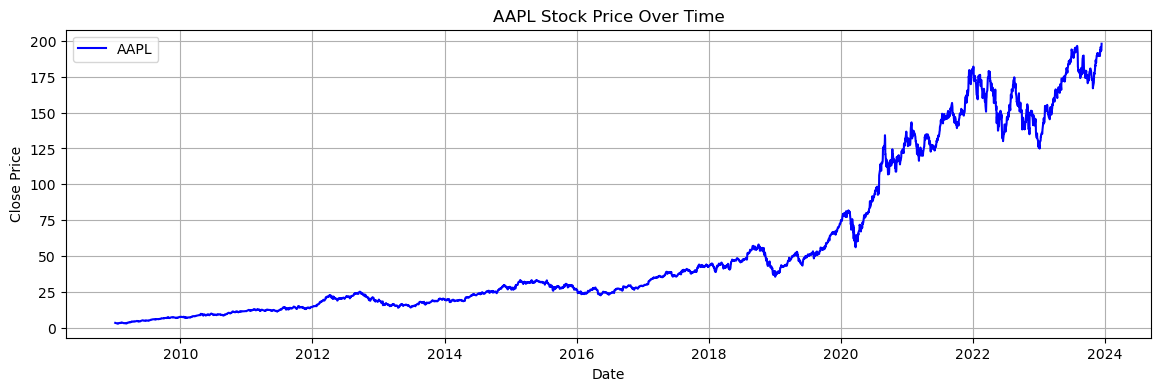

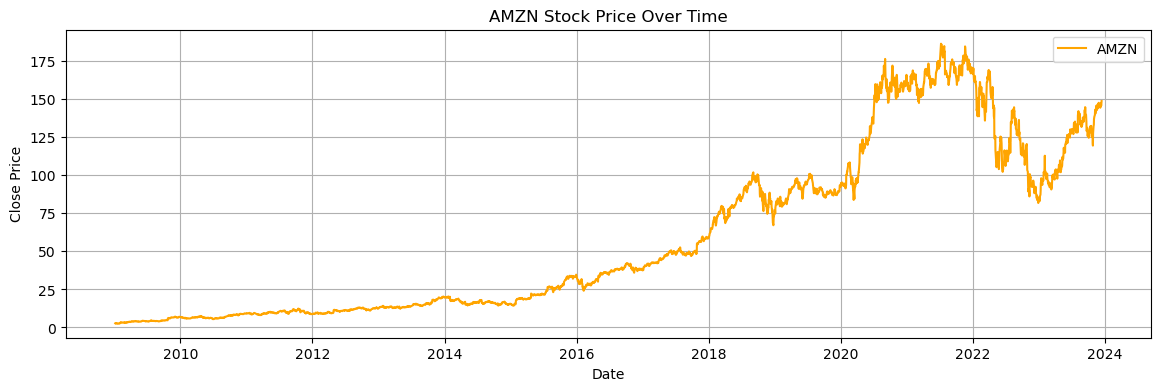

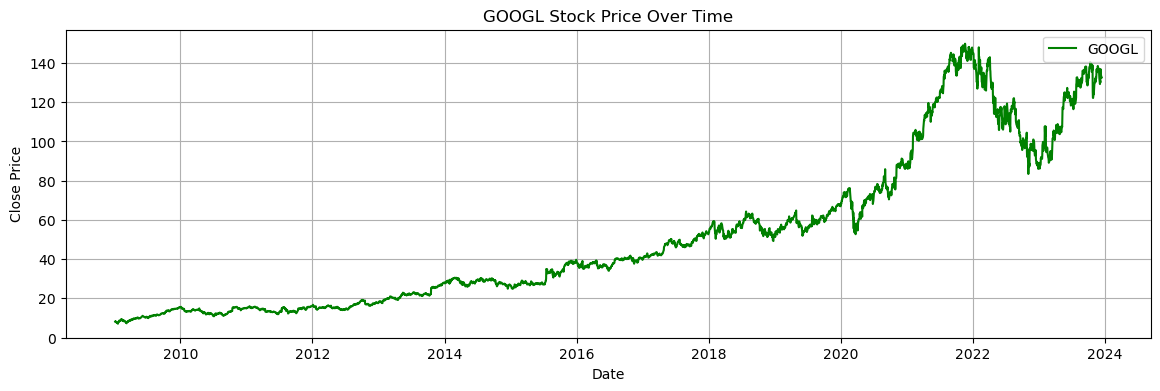

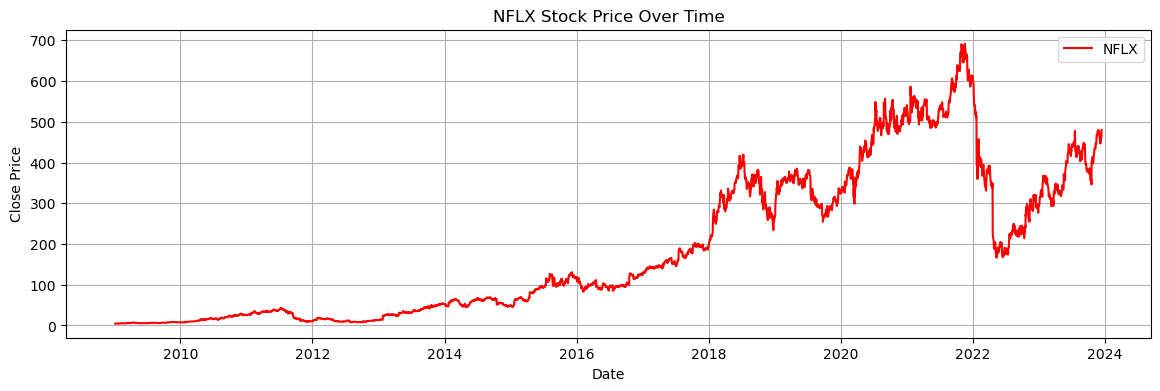

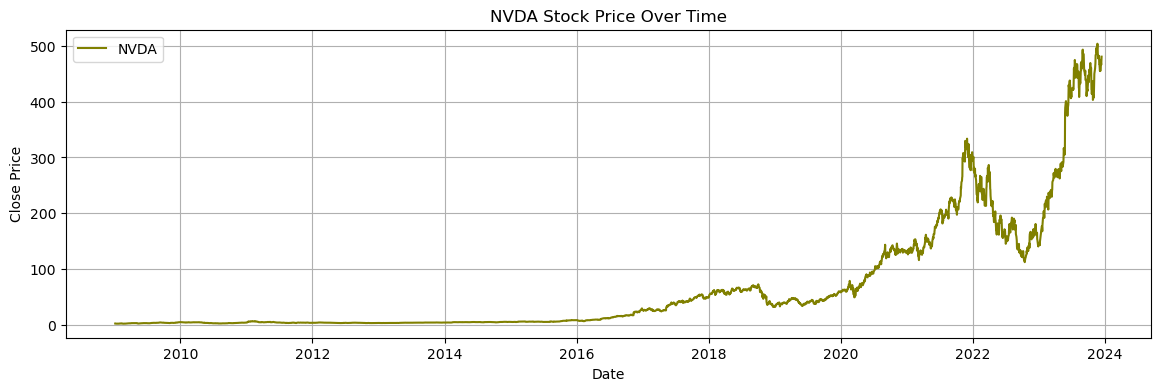

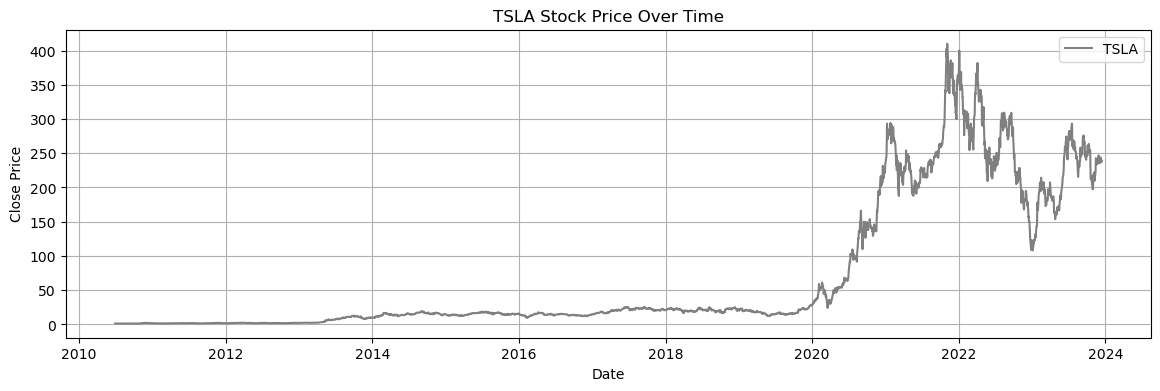

In [9]:
# visualize the charts for each stock
# Apple
plt.figure(figsize=(14, 4))
plt.plot(aapl_df['Close'], label='AAPL', color='blue')

plt.title('AAPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Amazon
plt.figure(figsize=(14, 4))
plt.plot(amzn_df['Close'], label='AMZN', color='orange')

plt.title('AMZN Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Google
plt.figure(figsize=(14, 4))
plt.plot(googl_df['Close'], label='GOOGL', color='green')

plt.title('GOOGL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Netflix
plt.figure(figsize=(14, 4))
plt.plot(nflx_df['Close'], label='NFLX', color='red')

plt.title('NFLX Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Nvidia
plt.figure(figsize=(14, 4))
plt.plot(nvda_df['Close'], label='NVDA', color='olive')

plt.title('NVDA Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()

# Tesla
plt.figure(figsize=(14, 4))
plt.plot(tsla_df['Close'], label='TSLA', color='gray')

plt.title('TSLA Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()

<Figure size 1400x1000 with 0 Axes>

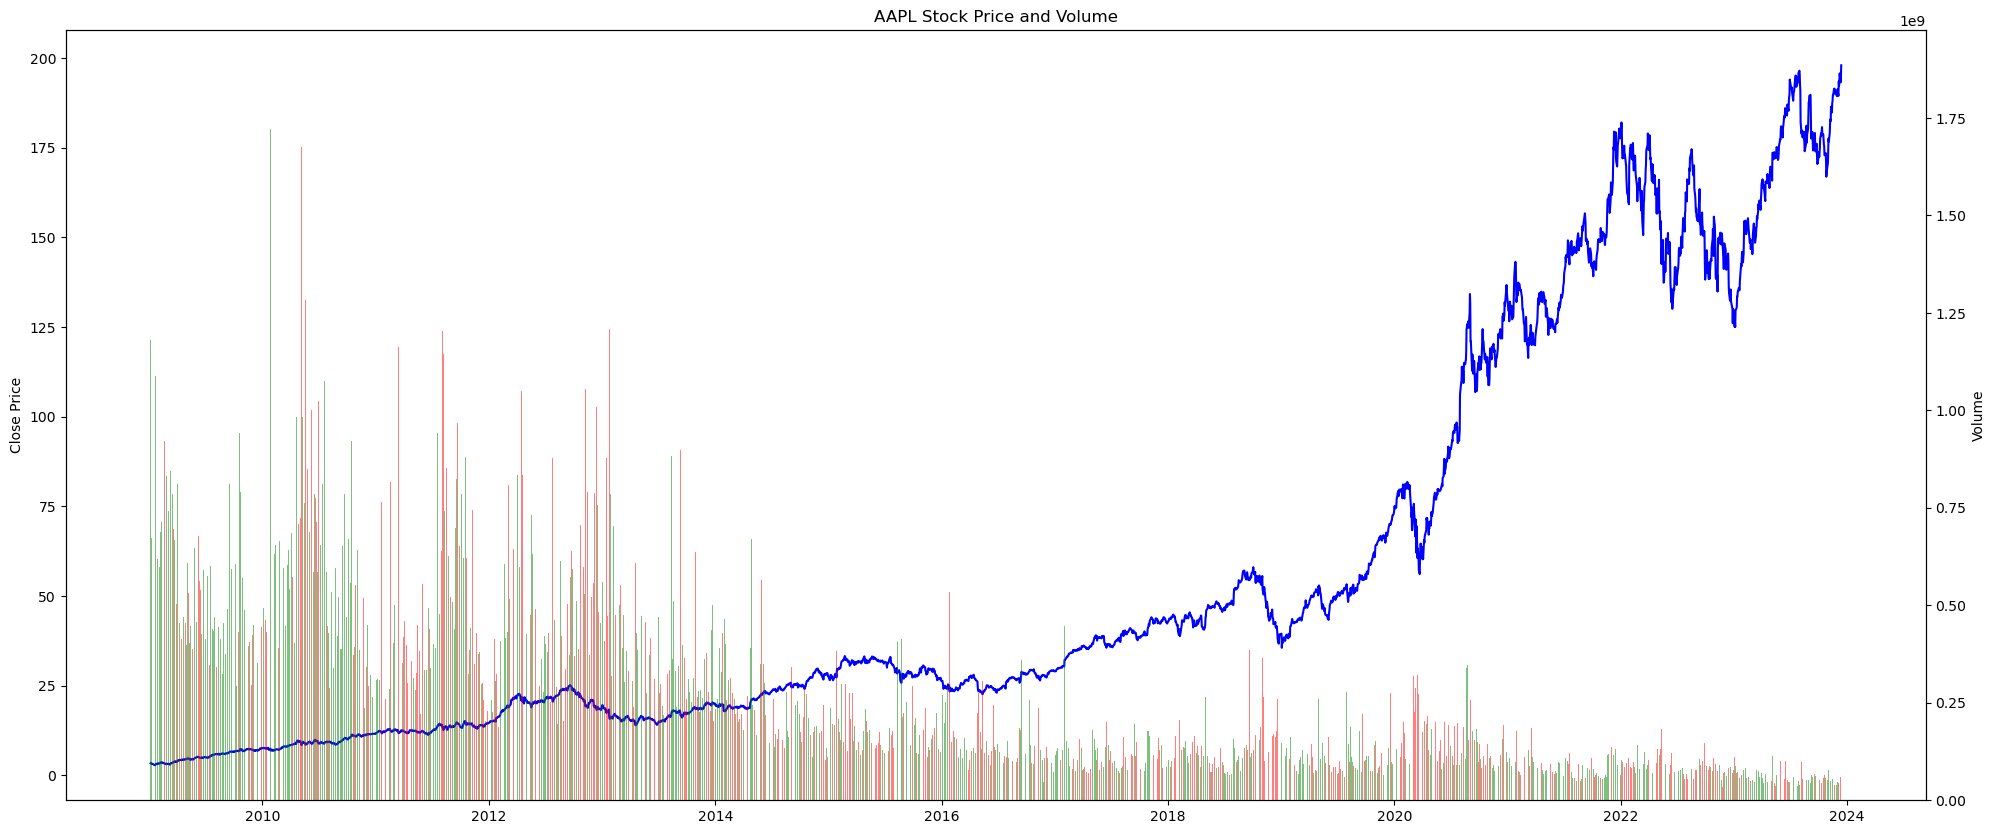

In [79]:
# set a variable for the closing of the day prior
aapl_df['close_shifted'] = aapl_df['Close'].shift(1)

# set the plot dimension
plt.figure(figsize=[14, 10])
plt.style.use('default')

# create subplots
fig, ax1 = plt.subplots(figsize=[24, 10])

# plot the stock price on the y-axis
ax1.plot(aapl_df.index, aapl_df['Close'], color='blue')
ax1.set_ylabel('Close Price')

ax2 = ax1.twinx()

# Color the volume bars and plot it on the y-axis on the right
volume_colors = ['red' if close_price < close_price_shifted else 'green' for close_price, close_price_shifted in zip(aapl_df['Close'], aapl_df['close_shifted'])]
ax2.bar(aapl_df.index, aapl_df['Volume'], color=volume_colors, alpha=0.5, label='Volume')
ax2.set_ylabel('Volume')

plt.title('AAPL Stock Price and Volume')
plt.xticks(rotation=45, ha='right')

plt.show()

In [11]:
# todo
aapl_df['close_shifted'] = aapl_df['Close'].shift(1)


fig = make_subplots(specs=[[{"secondary_y": True}]])

# create a plotly chart
fig.add_trace(go.Scatter(x=aapl_df.index, y=aapl_df['Close'], mode='lines', name='Close Price'), secondary_y=True)

fig.add_trace(go.Bar(x=aapl_df.index, y=aapl_df['Volume'], marker=dict(color=volume_colors), 
                     opacity=1, width=None, name='Volume'), secondary_y=False)

# label the graphics
fig.update_layout(
    title='AAPL Stock Price and Volume',
    yaxis=dict(title='Close Price', showgrid=True),
    yaxis2=dict(title='Volume', overlaying='y', side='right', showgrid=False),
    showlegend=True
)

fig.show()

## Missing values and dates

Despite believeing the data is perfectly clean, we'll perform a quick analysis to make sure there are absolutely no missing dates and/or values. Due to the nature of stock trading, there will be missing dates for Saturdays, Sundays and Holidays, days which the stock market is closed, so we'll account for that an delete these rows if they exist. 

From here on we'll do our due dilligence on the Apple stock and apply the concepts to the other stocks, considering that they all follow the same data parameter which is mandatory in publicly traded stocks.

In [12]:
# check for missing values
aapl_df.isna().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
close_shifted    1
dtype: int64

There are no missing values. However, due to the nature of stocks as mentioned previously, we do expect to see missing dates. Let's see exactly how many days are missing and how to deal with them.

In [13]:
# save the first and last days in variables
first_day = aapl_df.index.min()
last_day = aapl_df.index.max()

# stablish the full range of the dataset
full_range = pd.date_range(start=first_day, end=last_day, freq="D")

# 
aapl_missing_days = full_range.difference(aapl_df.index)

print(aapl_missing_days)

DatetimeIndex(['2009-01-10', '2009-01-11', '2009-01-17', '2009-01-18',
               '2009-01-19', '2009-01-24', '2009-01-25', '2009-01-31',
               '2009-02-01', '2009-02-07',
               ...
               '2023-11-12', '2023-11-18', '2023-11-19', '2023-11-23',
               '2023-11-25', '2023-11-26', '2023-12-02', '2023-12-03',
               '2023-12-09', '2023-12-10'],
              dtype='datetime64[ns]', length=1694, freq=None)


In [14]:
first_day, last_day

(Timestamp('2009-01-05 00:00:00'), Timestamp('2023-12-13 00:00:00'))

There are 1694 days missing from our dataset over the periods of 2009-01-05 and 2023-12-13. We have 3762 days recorded.

To proceed, I decided to fill the missing dates so we have a very consistence time series with daily values.

In [15]:
# reindex the data
# Apple
aapl_df_clean = aapl_df.reindex(full_range)
# Amazon
amzn_df_clean = amzn_df.reindex(full_range)
# Google
googl_df_clean = googl_df.reindex(full_range)
# Netflix
nflx_df_clean = nflx_df.reindex(full_range)
# Nvidia
nvda_df_clean = nvda_df.reindex(full_range)
# Tesla
tsla_df_clean = tsla_df.reindex()


In [16]:
# check if the new dates were indexed
aapl_df_clean.head(20)

Open      High       Low     Close  Adj Close        Volume  \
2009-01-05  3.327500  3.435000  3.311071  3.377857   2.863342  1.181608e+09   
2009-01-06  3.426786  3.470357  3.299643  3.322143   2.816114  1.289310e+09   
2009-01-07  3.278929  3.303571  3.223571  3.250357   2.755262  7.530488e+08   
2009-01-08  3.229643  3.326786  3.215714  3.310714   2.806425  6.735008e+08   
2009-01-09  3.328929  3.335000  3.219286  3.235000   2.742244  5.468456e+08   
2009-01-10       NaN       NaN       NaN       NaN        NaN           NaN   
2009-01-11       NaN       NaN       NaN       NaN        NaN           NaN   
2009-01-12  3.230714  3.249643  3.126786  3.166429   2.684118  6.177164e+08   
2009-01-13  3.151429  3.205000  3.083929  3.132500   2.655356  7.983976e+08   
2009-01-14  3.080000  3.116071  3.025714  3.047500   2.583303  1.021664e+09   
2009-01-15  2.877500  3.004286  2.858929  2.977857   2.524269  1.831634e+09   
2009-01-16  3.010714  3.013571  2.871429  2.940357   2.492481  1.047626e+09   
2009-01-17       NaN       NaN       NaN       NaN        NaN           NaN   
2009-01-18       NaN       NaN       NaN       NaN        NaN           NaN   
2009-01-19       NaN       NaN       NaN       NaN        NaN           NaN   
2009-01-20  2.926071  2.928571  2.792857  2.792857   2.367448  9.199148e+08   
2009-01-21  2.835357  2.960000  2.832500  2.958214   2.507618  1.089270e+09   
2009-01-22  3.144286  3.214286  3.065000  3.155714   2.675035  1.409528e+09   
2009-01-23  3.100714  3.209643  3.089286  3.155714   2.675035  7.637700e+08   
2009-01-24       NaN       NaN       NaN       NaN        NaN           NaN   

            close_shifted  
2009-01-05            NaN  
2009-01-06       3.377857  
2009-01-07       3.322143  
2009-01-08       3.250357  
2009-01-09       3.310714  
2009-01-10            NaN  
2009-01-11            NaN  
2009-01-12       3.235000  
2009-01-13       3.166429  
2009-01-14       3.132500  
2009-01-15       3.047500  
2009-01-16       2.977857  
2009-01-17            NaN  
2009-01-18            NaN  
2009-01-19            NaN  
2009-01-20       2.940357  
2009-01-21       2.792857  
2009-01-22       2.958214  
2009-01-23       3.155714  
2009-01-24            NaN

In [17]:
# observe if the number of null values changes since we created new rows
aapl_df_clean.isna().sum()

Open             1694
High             1694
Low              1694
Close            1694
Adj Close        1694
Volume           1694
close_shifted    1695
dtype: int64

In [18]:
# fill sequences of 2 consecutive days with a rolling averave. This should take care of all weekends.
window_size = 3
# Apple
aapl_df_clean = aapl_df_clean.rolling(window=window_size, min_periods=1).mean().round(6)
# Amazon
amzn_df_clean = amzn_df_clean.rolling(window=window_size, min_periods=1).mean().round(6)
# Google
googl_df_clean = googl_df_clean.rolling(window=window_size, min_periods=1).mean().round(6)
# Netflix
nflx_df_clean = nflx_df_clean.rolling(window=window_size, min_periods=1).mean().round(6)
# Nvidia
nvda_df_clean = nvda_df_clean.rolling(window=window_size, min_periods=1).mean().round(6)
# Tesla
tsla_df_clean = tsla_df_clean.rolling(window=window_size, min_periods=1).mean().round(6)

In [19]:
# check if there are any null values left
tsla_df_clean.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

We still have 104 Null values. We are going to visualize how distante these null values are from each other to determine the best way to deal with them.

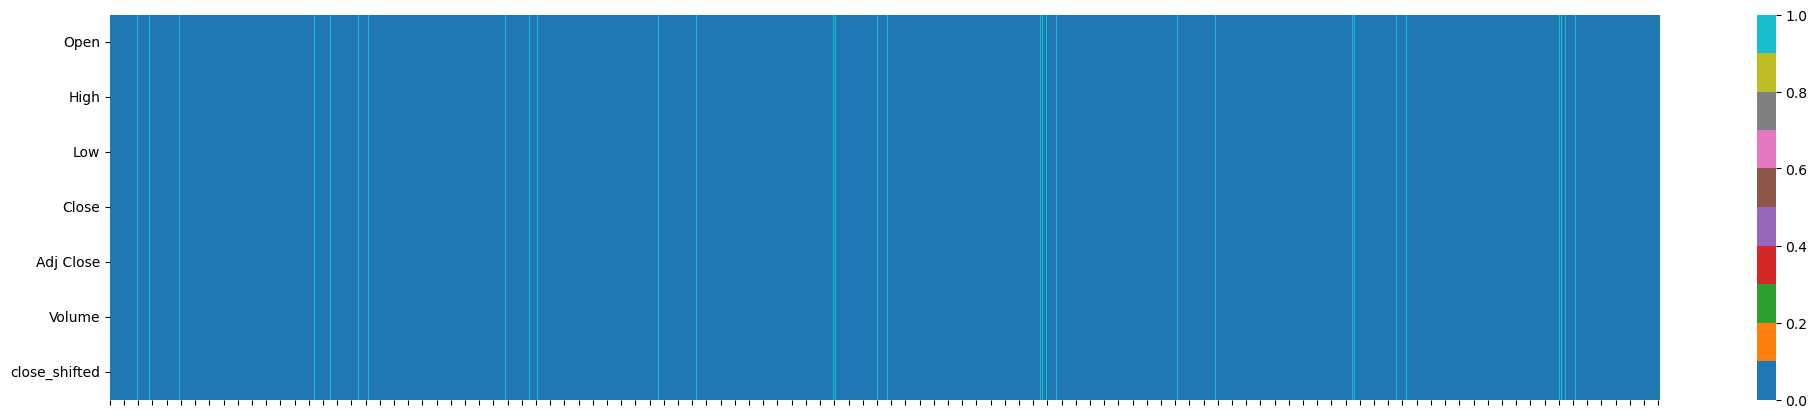

In [20]:
# visualize the distribution of the null values throughout our dataframe
plt.figure(figsize=(25, 5))
ax = sns.heatmap(aapl_df_clean.isna().T, cmap="tab10", cbar="False")
ax.set(xticklabels=[])

plt.show()

Since the null values are distant and well distributed in the extension of our dataframe, We will use `forward fill` to populate these rows.

In [21]:
# fill the missing values using forward fill
# Apple
aapl_df_clean = aapl_df_clean.fillna(method="ffill")
# Amazon
amzn_df_clean = amzn_df_clean.fillna(method="ffill")
# Google
googl_df_clean = googl_df_clean.fillna(method="ffill")
# Netflix
nflx_df_clean = nflx_df_clean.fillna(method="ffill")
# Nvidia
nvda_df_clean = nvda_df_clean.fillna(method="ffill")
# Tesla
tsla_df_clean = tsla_df_clean.fillna(method="ffill")

C:\Users\vitor\AppData\Local\Temp\ipykernel_25208\1607699598.py:3: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\vitor\AppData\Local\Temp\ipykernel_25208\1607699598.py:5: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\vitor\AppData\Local\Temp\ipykernel_25208\1607699598.py:7: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\vitor\AppData\Local\Temp\ipykernel_25208\1607699598.py:9: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\vitor\AppData\Local\Temp\ipykernel_25208\1607699598.py:11: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill()

In [22]:
# cheack if there are any missing values still. Substitute the dataframe as needed.
aapl_df_clean.isna().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
close_shifted    1
dtype: int64

With a cleaned data without null values or missing dates, we can look at the probability distribution of our data.


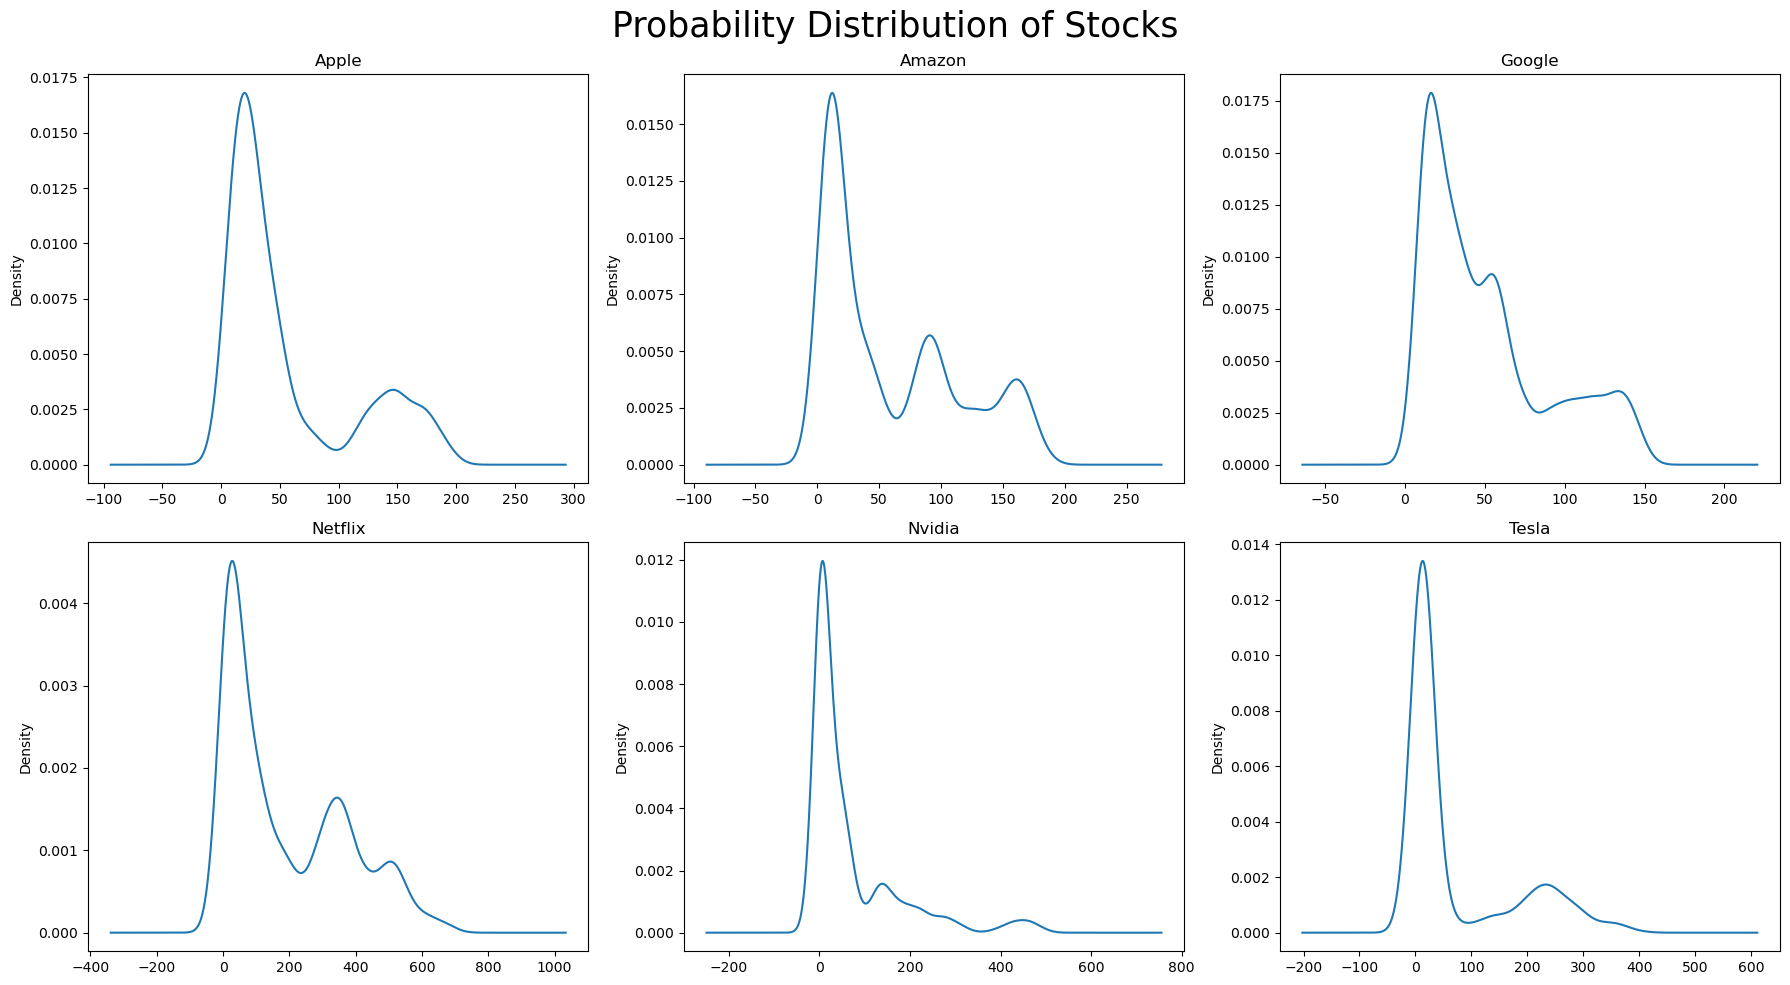

In [23]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10), sharex=False)
fig.suptitle('Probability Distribution of Stocks', size=25)

aapl_df_clean['Close'].plot(kind='kde', ax=axs[0, 0])
axs[0, 0].set_title('Apple')
amzn_df_clean['Close'].plot(kind='kde', ax=axs[0, 1])
axs[0, 1].set_title('Amazon')
googl_df_clean['Close'].plot(kind='kde', ax=axs[0, 2])
axs[0, 2].set_title('Google')
nflx_df_clean['Close'].plot(kind='kde', ax=axs[1, 0])
axs[1, 0].set_title('Netflix')
nvda_df_clean['Close'].plot(kind='kde', ax=axs[1, 1])
axs[1, 1].set_title('Nvidia')
tsla_df_clean['Close'].plot(kind='kde', ax=axs[1, 2])
axs[1, 2].set_title('Tesla')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

todo

Why probability distribution is important in a financial context?

## Trend-Seasonal Decomposition

A time series is regarded as having three systematic components(level, trend, seasonality), and one non-systematic component(residuals).
We'll then proceed to decompose our data in order to visualise those components individually.
Before, though, we must determine whether a series is stationary, which is a desirable property of time series data. A time series is considered stationary when its statistical properties, such as mean and variance, remain constant over time.

In [24]:
from statsmodels.tsa.stattools import adfuller

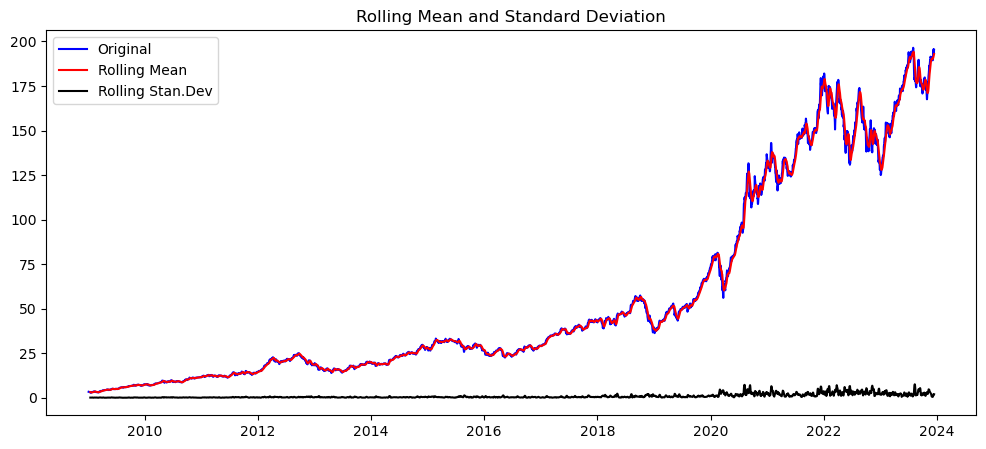

Results of dickey fuller test
Test Statistics                   1.139115
p-value                           0.995537
No. of lags used                 30.000000
Number of observations used    5425.000000
critical value (1%)              -3.431556
critical value (5%)              -2.862073
critical value (10%)             -2.567054
dtype: float64


In [25]:
# test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.figure(figsize=(12, 5))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Stan.Dev')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(aapl_df_clean['Close'])

We can see in our graphic both the `mean` and `standard deviation` are not constant, therefore our data is not stationary. Additionally the `p-value` = 99% also negates our Null hypothesis of a stationary data.
By decomposing our data into the separate components mentioned above, we can work on the trend separetely to reduce the magnitude of the values, causing our data to become stagnant, thus allowing us to perform a time series analysis.

In [26]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:
# instantiate our seasonal_decompose function
decomposition = tsa.seasonal_decompose(aapl_df_clean["Close"], model = 'multiplicative', period = 30)

In [28]:
type(decomposition)

statsmodels.tsa.seasonal.DecomposeResult

In [29]:
aapl_df_clean["Trend"] = decomposition.trend
aapl_df_clean["Seasonal"] = decomposition.seasonal
aapl_df_clean["Residual"] = decomposition.resid

aapl_df_clean.head(10)

Open      High       Low     Close  Adj Close        Volume  \
2009-01-05  3.327500  3.435000  3.311071  3.377857   2.863342  1.181608e+09   
2009-01-06  3.377143  3.452678  3.305357  3.350000   2.839728  1.235459e+09   
2009-01-07  3.344405  3.402976  3.278095  3.316786   2.811573  1.074656e+09   
2009-01-08  3.311786  3.366905  3.246309  3.294405   2.792600  9.052867e+08   
2009-01-09  3.279167  3.321786  3.219524  3.265357   2.767977  6.577984e+08   
2009-01-10  3.279286  3.330893  3.217500  3.272857   2.774334  6.101732e+08   
2009-01-11  3.328929  3.335000  3.219286  3.235000   2.742244  5.468456e+08   
2009-01-12  3.230714  3.249643  3.126786  3.166429   2.684118  6.177164e+08   
2009-01-13  3.191071  3.227322  3.105358  3.149464   2.669737  7.080570e+08   
2009-01-14  3.154048  3.190238  3.078810  3.115476   2.640926  8.125927e+08   

            close_shifted  Trend  Seasonal  Residual  
2009-01-05            NaN    NaN  1.000202       NaN  
2009-01-06       3.377857    NaN  0.999495       NaN  
2009-01-07       3.350000    NaN  1.000011       NaN  
2009-01-08       3.316786    NaN  1.000309       NaN  
2009-01-09       3.294405    NaN  0.999997       NaN  
2009-01-10       3.280535    NaN  0.998945       NaN  
2009-01-11       3.310714    NaN  0.999999       NaN  
2009-01-12       3.235000    NaN  0.999616       NaN  
2009-01-13       3.200714    NaN  0.999112       NaN  
2009-01-14       3.177976    NaN  0.998617       NaN

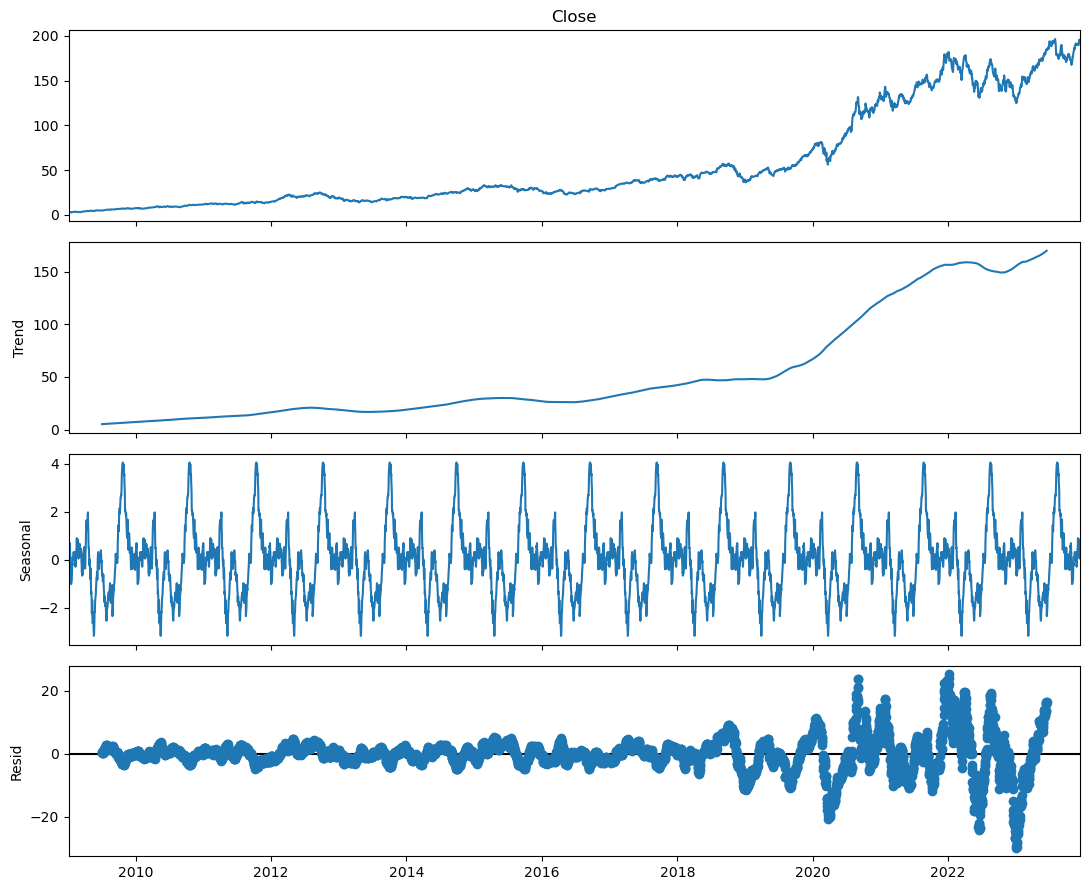

In [80]:
plt.rcParams['figure.figsize'] = (11, 9)
decomposed_aapl = sm.tsa.seasonal_decompose(aapl_df_clean["Close"],period=360)
figure = decomposed_aapl.plot()
plt.show()

We have decomposed the data into `Trend`, `Seasonality` and `Residual`. Now we can take the natural logarithm of the original data. The logarithm transformation is often applied to handle situations where the data has a significant trend.
The next step is, then, to calculate a rolling average. We'll use a 12 month's moving average, which corresponds 1 year of stock cycle. It helps reducing short term fluctuation and reveal long-term trend. 

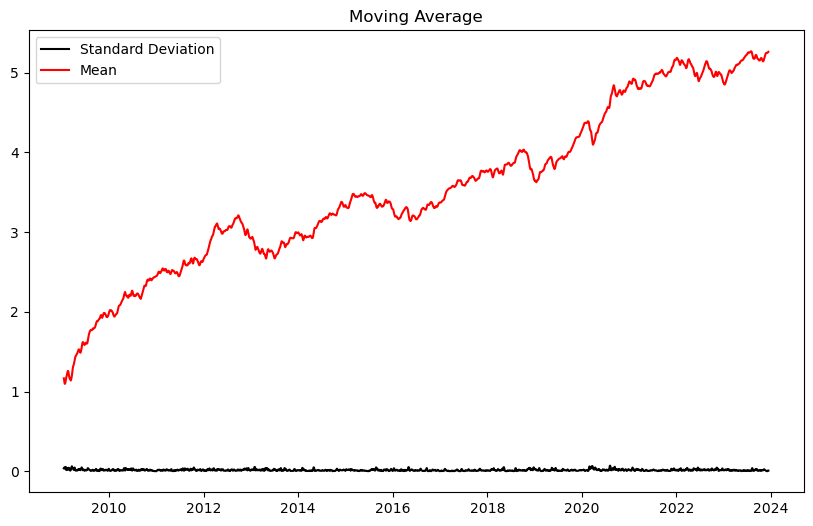

In [31]:
plt.rcParams['figure.figsize'] = 10, 6
aapl_close_log = np.log(aapl_df_clean['Close'])
moving_avg = aapl_close_log.rolling(12).mean()
std_dev = aapl_close_log.rolling(12).std()

plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")

plt.legend(loc='best')
plt.title('Moving Average')
plt.legend()
plt.show()

In [32]:
print(aapl_close_log)

2009-01-05    1.217241
2009-01-06    1.208960
2009-01-07    1.198996
2009-01-08    1.192226
2009-01-09    1.183369
                ...   
2023-12-09    5.272948
2023-12-10    5.276634
2023-12-11    5.263622
2023-12-12    5.267575
2023-12-13    5.274452
Freq: D, Name: Close, Length: 5456, dtype: float64


## Forecasting using ARIMA

The first model we'll use to perform our prediction is ARIMA (AutoRegressive Integrated Moving Average). ARIMA is a popular and powerful time series forecasting model that is also widely used in the finance market.

In [33]:
from sklearn.model_selection import train_test_split

# split the data into train and text
aapl_train_data = aapl_close_log[:int(len(aapl_close_log)*0.8)]
aapl_test_data = aapl_close_log[int(len(aapl_close_log)*0.8):]

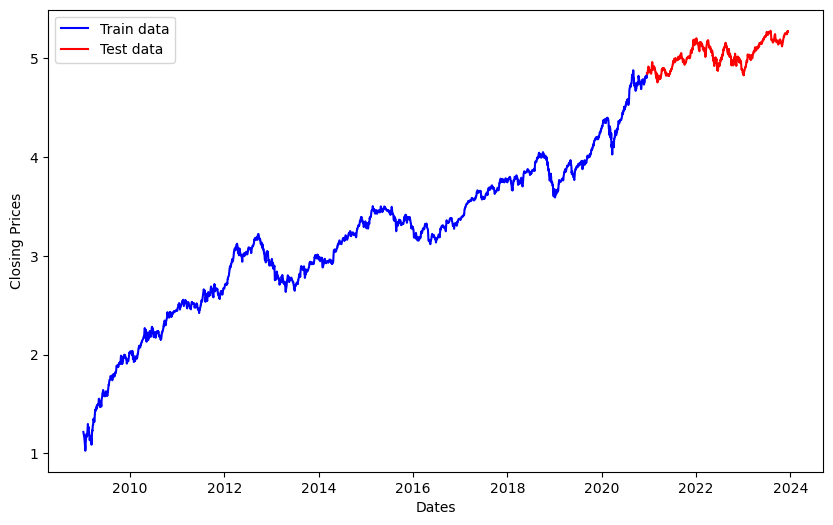

In [81]:
# plot the split data
plt.figure(figsize=(10,6))

plt.plot(aapl_train_data, 'b', label='Train data')
plt.plot(aapl_test_data, 'r', label='Test data')

plt.grid(False)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.legend()
plt.show()

The ARIMA model takes three main order parameters: p, q and d. `p` is the order of the Auto Regressive component, `q` is the difference and `d` is the order of the Moving Average component.
In order to find the best parametrers we'll run an `Auto ARIMA` funtion. It'll help us discover the optimal values for our model.

In [35]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-27025.469, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-27250.485, Time=0.55 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-27189.216, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-27002.419, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-27351.427, Time=0.68 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-27390.928, Time=0.70 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-27387.958, Time=1.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-27352.510, Time=2.57 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-27378.906, Time=0.24 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 7.672 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4364
Model:               SARIMAX(3, 1, 0)   Log Likelihood               13700.464
Date:                Tue, 16 Ja

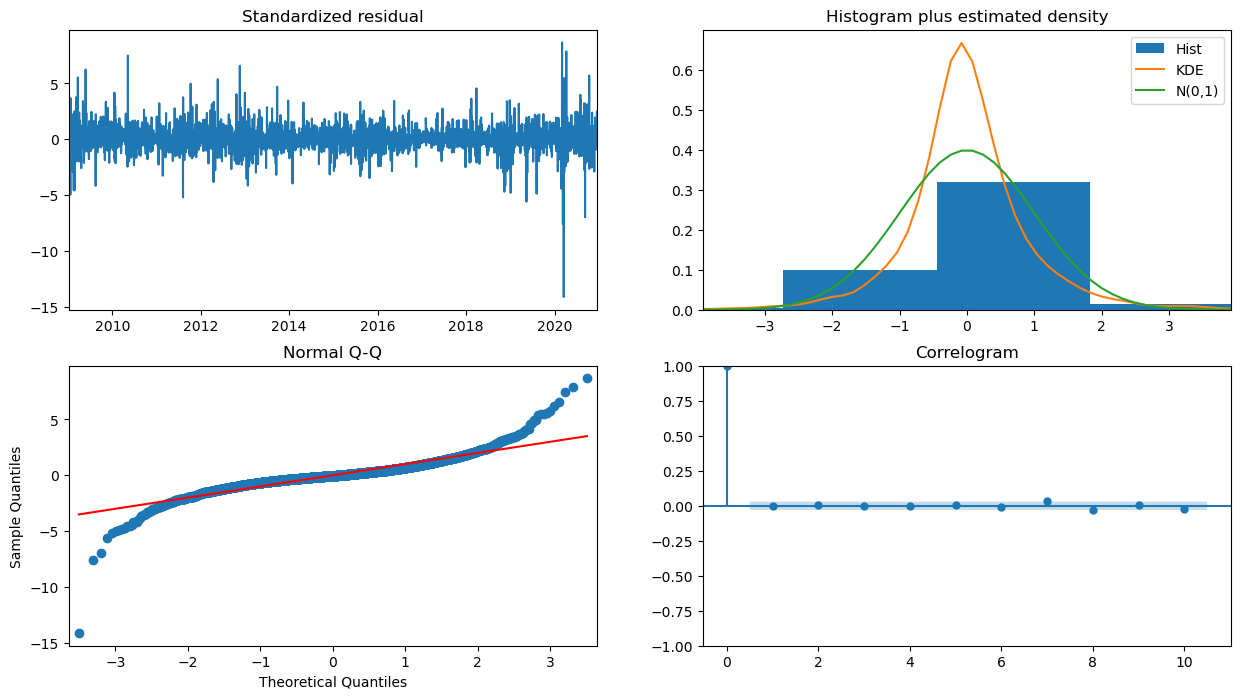

In [37]:
# run an auto_arima function to find optimal values for p, q and d parameters
model_autoARIMA = auto_arima(aapl_train_data, start_p=0, start_q=0, test='adf', max_p=3, max_q=3, m=1, d=None, 
                             seasonal=False, start_P=0, D=0, trace=True, stepwise=True)

print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

The 'auto_arima' function gave us the optimal values (3, 1, 0), for the p, d, q parameters, respectivelly. We can now fit our model based on these values.

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math


In [39]:
# fit ARIMA model
p_param = 3
d_param = 1
q_param = 0

model = ARIMA(aapl_train_data, order=(p_param, d_param, q_param))

aapl_fitted = model.fit()
aapl_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 4364
Model:                 ARIMA(3, 1, 0)   Log Likelihood               13693.453
Date:                Tue, 16 Jan 2024   AIC                         -27378.906
Time:                        16:27:13   BIC                         -27353.383
Sample:                    01-05-2009   HQIC                        -27369.899
                         - 12-16-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2084      0.008     25.183      0.000       0.192       0.225
ar.L2          0.1741      0.012     15.136      0.000       0.152       0.197
ar.L3         -0.0945      0.011     -8.307      0.000      -0.117      -0.072
sigma2         0.0001   8.59e-07    128.066      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             55043.10
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
forecast = aapl_fitted.get_forecast(steps=1000)
forecast_values = forecast.predicted_mean

In [70]:
#forecast
forecast_values

2020-12-17    4.841326
2020-12-18    4.841713
2020-12-19    4.842168
2020-12-20    4.841721
2020-12-21    4.841670
                ...   
2023-09-08    4.841539
2023-09-09    4.841539
2023-09-10    4.841539
2023-09-11    4.841539
2023-09-12    4.841539
Freq: D, Name: predicted_mean, Length: 1000, dtype: float64

In [71]:
forecast_ci = forecast.conf_int()

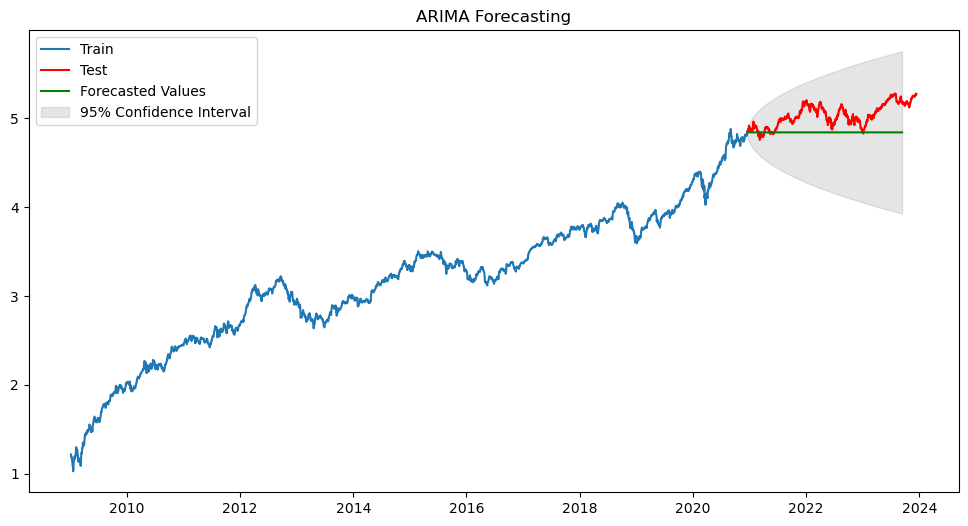

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(aapl_train_data, label='Train')
plt.plot(aapl_test_data, color='red', label='Test')
plt.plot(forecast_values, color='green', label='Forecasted Values')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2, label='95% Confidence Interval')
plt.legend()
plt.title('ARIMA Forecasting')
plt.show()

In [44]:
mse = mean_squared_error(aapl_test_data[:365], forecast_values)
print('MSE: '+str(mse))
mae = mean_absolute_error(aapl_test_data[:365], forecast_values)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(aapl_test_data[:365], forecast_values))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(forecast_values - aapl_test_data[:365])/np.abs(aapl_test_data[:365]))
print('MAPE: '+str(mape))

MSE: 0.015703068978243404
MAE: 0.09816278939244054
RMSE: 0.1253118868194211
MAPE: 0.019647700333355864


Having a MAPE (Mean Absolute Percentage Error) of 1.98% we can conclude our model is 98.02% accurate in predicting the next 365 observations

## Reconstruct the data

We have plotted our prediction based on the fitted data. Now let's reconstruct it to visualize how it looks on our original time series.

In [45]:
# todo

## Forecasting using Neural Networks

In [46]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'